# Model Building

In [1]:
# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading dataset

In [4]:
df = pd.read_csv("titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Getting some info about dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# Handaling missing value

In [8]:
## Filling With mean for numerical features
df["Age"].fillna(df["Age"].mean(), inplace=True)

In [9]:
# Filling with mode for categorical features
df["Embarked"].fillna(df["Embarked"].mode(), inplace=True)

In [10]:
### Data Cleaning

In [17]:
### Droping some columns for base line model
new_df = df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1)

In [18]:
new_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [19]:
# Converting categorical feature to numerical features using one hot encoding

In [22]:
new_df = pd.get_dummies(new_df)

In [23]:
new_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [24]:
# Spliting dataset onto dependent and independent features
y = new_df["Survived"]
X = new_df.drop(["Survived"], axis=1)

In [25]:
# train test split

In [26]:
# Before spliting into training and test set, let's check our data ratio

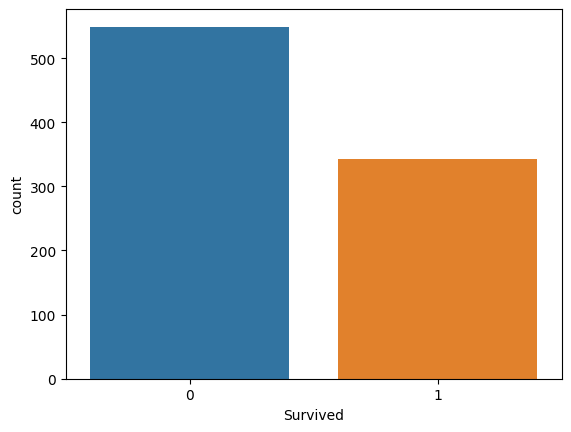

In [29]:
sns.countplot(x=df["Survived"])
plt.show()

In [30]:
# Here our dataset is im-blanced, so we need to maintain this ratio while splititing our data into train and test set

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [33]:
X_train.shape, X_test.shape

((712, 10), (179, 10))

In [34]:
### Feature Scalling

In [35]:
from sklearn.preprocessing import StandardScaler

In [50]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [36]:
scaler = StandardScaler()

In [46]:
scaler.fit(X_train[["Age", "Fare"]])

StandardScaler()

In [51]:
X_train_scaled[["Age", "Fare"]] = scaler.transform(X_train[["Age", "Fare"]])

In [52]:
X_test_scaled[["Age", "Fare"]] = scaler.transform(X_test[["Age", "Fare"]])

In [53]:
## Building a basic logistic regression model

In [60]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr_model = LogisticRegression()

In [56]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [58]:
lr_y_pred = lr_model.predict(X_test_scaled)

In [59]:
lr_y_pred

array([1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [61]:
accuracy_score(lr_y_pred, y_test)

0.7988826815642458